In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations_with_replacement

In [65]:
df = pd.read_csv('Regression.txt', sep=',', header=None, names=["X1", "X2", "y"])
df = df[:250]
df.head()

,X1,X2,y
0,0.713,-0.345,-9.441
1,-0.245,1.684,2.795
2,1.388,-0.395,-6.032
3,1.556,-1.351,1.558
4,-1.162,-0.213,2.496


In [66]:
shuffle_df = df.sample(frac=1)
train_size = int(0.8 * len(df))
train_set = shuffle_df[:train_size]
test_set = shuffle_df[train_size:]

In [67]:
X_train = train_set[['X1', 'X2']].to_numpy()
X_test = test_set[['X1', 'X2']].to_numpy()
y_train = train_set[['y']].to_numpy()
y_test = test_set[['y']].to_numpy()

In [68]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(200, 2)
(200, 1)
(50, 2)
(50, 1)


In [69]:
def get_powers(degree):
    l=[0,1]
    powers=[]
    for i in range(1,degree+1):
        powers.append([x for x in combinations_with_replacement(l,i)])
    powers_flattened=[]
    for sublist in powers:
        for x in sublist:
            powers_flattened.append(x)
    return powers_flattened

In [70]:
def transform_data(X,powers):
    X_new=np.ones((X.shape[0],len(powers)))
    for n in range(X.shape[0]):
        #print(n)
        for i in range(len(powers)):
            for j in powers[i]:
                X_new[n][i]=X_new[n][i]*X[n][j]
    return X_new

In [71]:
powers_1=get_powers(1)
powers_2=get_powers(2)
powers_3=get_powers(3)
powers_4=get_powers(4)
print('For each polynomial 0 represents X1, 1 represents X2 \n')
print('Polynomial 1')
print(powers_1, '\n')
print('Polynomial 2')
print(powers_2, '\n')
print('Polynomial 3')
print(powers_3, '\n')
print('Polynomial 4')
print(powers_4)

For each polynomial 0 represents X1, 1 represents X2 

Polynomial 1
[(0,), (1,)] 

Polynomial 2
[(0,), (1,), (0, 0), (0, 1), (1, 1)] 

Polynomial 3
[(0,), (1,), (0, 0), (0, 1), (1, 1), (0, 0, 0), (0, 0, 1), (0, 1, 1), (1, 1, 1)] 

Polynomial 4
[(0,), (1,), (0, 0), (0, 1), (1, 1), (0, 0, 0), (0, 0, 1), (0, 1, 1), (1, 1, 1), (0, 0, 0, 0), (0, 0, 0, 1), (0, 0, 1, 1), (0, 1, 1, 1), (1, 1, 1, 1)]


In [72]:
X_train_1=transform_data(X_train,powers_1)
X_train_2=transform_data(X_train,powers_2)
X_train_3=transform_data(X_train,powers_3)
X_train_4=transform_data(X_train,powers_4)
X_test_1=transform_data(X_test,powers_1)
X_test_2=transform_data(X_test,powers_2)
X_test_3=transform_data(X_test,powers_3)
X_test_4=transform_data(X_test,powers_4)

In [73]:
print('New X for each polynomial\n')
print('Polynomial 1')
print(X_train_1[0:2], '\n')
print('Polynomial 2')
print(X_train_2[0:2], '\n')
print('Polynomial 3')
print(X_train_3[0:2], '\n')
print('Polynomial 4')
print(X_train_4[0:2])

New X for each polynomial

Polynomial 1
[[ 0.574 -1.885]
 [-0.151 -0.094]] 

Polynomial 2
[[ 0.574    -1.885     0.329476 -1.08199   3.553225]
 [-0.151    -0.094     0.022801  0.014194  0.008836]] 

Polynomial 3
[[ 5.74000000e-01 -1.88500000e+00  3.29476000e-01 -1.08199000e+00
   3.55322500e+00  1.89119224e-01 -6.21062260e-01  2.03955115e+00
  -6.69782913e+00]
 [-1.51000000e-01 -9.40000000e-02  2.28010000e-02  1.41940000e-02
   8.83600000e-03 -3.44295100e-03 -2.14329400e-03 -1.33423600e-03
  -8.30584000e-04]] 

Polynomial 4
[[ 5.74000000e-01 -1.88500000e+00  3.29476000e-01 -1.08199000e+00
   3.55322500e+00  1.89119224e-01 -6.21062260e-01  2.03955115e+00
  -6.69782913e+00  1.08554435e-01 -3.56489737e-01  1.17070236e+00
  -3.84455392e+00  1.26254079e+01]
 [-1.51000000e-01 -9.40000000e-02  2.28010000e-02  1.41940000e-02
   8.83600000e-03 -3.44295100e-03 -2.14329400e-03 -1.33423600e-03
  -8.30584000e-04  5.19885601e-04  3.23637394e-04  2.01469636e-04
   1.25418184e-04  7.80748960e-05]]


Starting code for Linear gradient descent

In [74]:
def initialize_parameters(lenw):
    #w = np.random.randn(1,lenw)
    w = np.zeros((1,lenw))
    b = 0
    return w,b

In [75]:
def forward_prop(X,w,b):
    z = np.dot(w,X) + b
    return z

In [76]:
def cost_function(z,y):
    m = y.shape[1]
    J=(1/(2*m))*np.sum(np.square(z-y))
    return J

In [77]:
def back_prop(X,y,z):
    m = y.shape[1]
    dz = (1/m)*(z-y)
    dw = np.dot(dz,X.T)
    db = np.sum(dz)
    return dw,db

In [78]:
def gradient_descent_update(w,b,dw,db,learning_rate):
    w = w - learning_rate*dw
    b = b - learning_rate*db
    return w,b

In [79]:
def linear_regression_model(X_train, y_train, X_val, y_val, learning_rate, epochs):
    lenw = X_train.shape[0]
    w,b = initialize_parameters(lenw)
    
    
    costs_train = []
    
    m_train = X_train.shape[1]
    m_val = X_val.shape[1]
    
    for i in range(1,epochs+1):
        z_train = forward_prop(X_train,w,b)
        cost_train = cost_function(z_train, y_train)
        dw,db = back_prop(X_train, y_train, z_train)
        w,b = gradient_descent_update(w,b,dw,db,learning_rate)
        
        dw_avg = np.mean(np.abs(dw))
        
        #break if mean gradient is below tolerance
        #if dw_avg <= tolerance:
            #if i < epochs:
            #    learning_rate = learning_rate - 0.0002
            #    linear_regression_model(X_train,y_train,X_val,y_val,learning_rate,epochs,0.2)
            #    
            #    print('yes')
            #if i == epochs:
            #    print('Epochs ' +str(i)+'/'+str(epochs)+': ')
            #    print('Training cost '+str(cost_train)+ '|'+'Validation cost '+str(cost_val))
            #    print('MSE cost '+str(MAE_train)+ '|'+'Validation MSE '+str(MSE_val))
            #    print('gradient' +str(dw))
            #    print('The final learning rate used is: '+ str(learning_rate))
            #    print('-------------------------------')
            #    plt.plot(costs_train)
            #    plt.xlabel('iterations')
            #    plt.ylabel('Training cost')
            #    plt.title('Learning rate '+str(learning_rate))
            #    plt.show()
                
            #break
        
        
        if i%10==0:
            costs_train.append(cost_train)
            
        MAE_train = (1/m_train)*np.sum(np.abs(z_train-y_train))
        MSE_train = (1/m_train)*np.sum(np.square(z_train-y_train))
        
        z_val = forward_prop(X_val,w,b)
        cost_val = cost_function(z_val, y_val)
        MAE_val = (1/m_val)*np.sum(np.abs(z_val-y_val))
        MSE_val = (1/m_val)*np.sum(np.square(z_val-y_val))
        #print('Epochs ' +str(i)+'/'+str(epochs)+': ')
        #print('Training cost '+str(cost_train)+ '|'+'Validation cost '+str(cost_val))
        #print('MAE cost '+str(MAE_train)+ '|'+'Validation MAE '+str(MAE_val))
        #print('MSE cost '+str(MAE_train)+ '|'+'Validation MSE '+str(MSE_val))
        #print('gradient' +str(dw))
        #print(dw_avg)

    print('Epochs ' +str(i)+'/'+str(epochs)+': ')
    print('Training cost '+str(cost_train)+ '|'+'Validation cost '+str(cost_val))
    #print('MSE cost '+str(MAE_train)+ '|'+'Validation MSE '+str(MSE_val))
    #print('gradient' +str(dw))
    print('The final average gradient is: '+ str(dw_avg))
    print('The final learning rate used is: '+ str(learning_rate))
    print('The Mean square error is: '+ str(MSE_val))
    print('-------------------------------')
    #plt.plot(costs_train)
    #plt.xlabel('iterations')
    #plt.ylabel('Training cost')
    #plt.title('Learning rate '+str(learning_rate))
    #plt.show()

    
    return costs_train, learning_rate, cost_train, cost_val

In [80]:
#Flip to fit gradient descent code
X_train=X_train.T
X_val=X_test.T
X_train_1=X_train_1.T
X_train_2=X_train_2.T
X_train_3=X_train_3.T
X_train_4=X_train_4.T
X_val_1=X_test_1.T
X_val_2=X_test_2.T
X_val_3=X_test_3.T
X_val_4=X_test_4.T
y_train=y_train.T
y_val=y_test.T

In [81]:
print(X_train_2.shape)
print(y_train.shape)
print(X_val_2.shape)
print(y_val.shape)

(5, 200)
(1, 200)
(5, 50)
(1, 50)


In [82]:
costs120, learning120, trainingloss120, validationloss120 = linear_regression_model(X_train_1,y_train,X_val_1,y_val,0.12,20)
costs220, learning220, trainingloss220, validationloss220 = linear_regression_model(X_train_2,y_train,X_val_2,y_val,0.12,20)
costs320, learning320, trainingloss320, validationloss320 = linear_regression_model(X_train_3,y_train,X_val_3,y_val,0.08,20)
costs420, learning320, trainingloss420, validationloss420 = linear_regression_model(X_train_4,y_train,X_val_4,y_val,0.02,20)

Epochs 20/20: 
Training cost 12.36719265121272|Validation cost 15.968554275809344
The final average gradient is: 0.11112276895688249
The final learning rate used is: 0.12
The Mean square error is: 31.93710855161869
-------------------------------
Epochs 20/20: 
Training cost 5.409900058000931|Validation cost 8.437905775302943
The final average gradient is: 0.058161195165260346
The final learning rate used is: 0.12
The Mean square error is: 16.875811550605885
-------------------------------
Epochs 20/20: 
Training cost 4.197446986736064|Validation cost 5.765788426919702
The final average gradient is: 0.08114179738508304
The final learning rate used is: 0.08
The Mean square error is: 11.531576853839404
-------------------------------
Epochs 20/20: 
Training cost 4.587815094336155|Validation cost 5.928048378780054
The final average gradient is: 0.1361250345341026
The final learning rate used is: 0.02
The Mean square error is: 11.856096757560108
-------------------------------


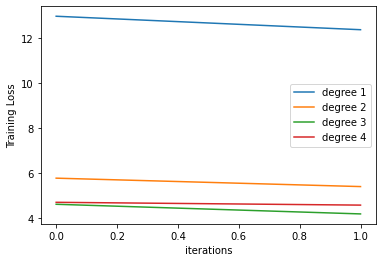

In [83]:
plt.plot(costs120)
plt.plot(costs220)
plt.plot(costs320)
plt.plot(costs420)
plt.xlabel('iterations')
plt.ylabel('Training Loss')
plt.legend(["degree 1", "degree 2", "degree 3", "degree 4"])
plt.show()


In [84]:
costs140, learning140, trainingloss140, validationloss140 = linear_regression_model(X_train_1,y_train,X_val_1,y_val,0.12,40)
costs240, learning240, trainingloss240, validationloss240 = linear_regression_model(X_train_2,y_train,X_val_2,y_val,0.12,40)
costs340, learning340, trainingloss340, validationloss340 = linear_regression_model(X_train_3,y_train,X_val_3,y_val,0.1,40)
costs440, learning340, trainingloss440, validationloss440 = linear_regression_model(X_train_4,y_train,X_val_4,y_val,0.03,40)

Epochs 40/40: 
Training cost 12.329060636459117|Validation cost 16.142457754020526
The final average gradient is: 0.006611266531208704
The final learning rate used is: 0.12
The Mean square error is: 32.28491550804105
-------------------------------
Epochs 40/40: 
Training cost 5.318736920148479|Validation cost 8.422942789676092
The final average gradient is: 0.015025154184691076
The final learning rate used is: 0.12
The Mean square error is: 16.845885579352185
-------------------------------
Epochs 40/40: 
Training cost 4.018092283125011|Validation cost 5.5114688609422124
The final average gradient is: 0.02409400579459918
The final learning rate used is: 0.1
The Mean square error is: 11.022937721884425
-------------------------------
Epochs 40/40: 
Training cost 4.3932297171946155|Validation cost 5.7749087794522636
The final average gradient is: 0.13744542590128028
The final learning rate used is: 0.03
The Mean square error is: 11.549817558904527
-------------------------------


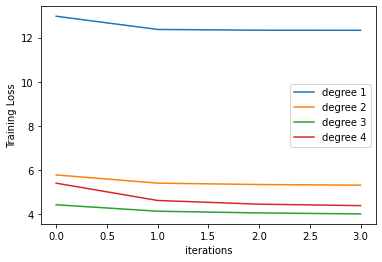

In [85]:
plt.plot(costs140)
plt.plot(costs240)
plt.plot(costs340)
plt.plot(costs440)
plt.xlabel('iterations')
plt.ylabel('Training Loss')
plt.legend(["degree 1", "degree 2", "degree 3", "degree 4"])
plt.show()

In [86]:
costs160, learning160, trainingloss160, validationloss160 = linear_regression_model(X_train_1,y_train,X_val_1,y_val,0.12,60)
costs260, learning260, trainingloss260, validationloss260 = linear_regression_model(X_train_2,y_train,X_val_2,y_val,0.12,60)
costs360, learning360, trainingloss360, validationloss360 = linear_regression_model(X_train_3,y_train,X_val_3,y_val,0.1,60)
costs460, learning460, trainingloss460, validationloss460 = linear_regression_model(X_train_4,y_train,X_val_4,y_val,0.02,60)

Epochs 60/60: 
Training cost 12.32878695360108|Validation cost 16.15281428667083
The final average gradient is: 0.0005815788430556378
The final learning rate used is: 0.12
The Mean square error is: 32.30562857334166
-------------------------------
Epochs 60/60: 
Training cost 5.293743610912647|Validation cost 8.443256282347978
The final average gradient is: 0.008300722075667434
The final learning rate used is: 0.12
The Mean square error is: 16.886512564695956
-------------------------------
Epochs 60/60: 
Training cost 3.973847134582607|Validation cost 5.4795882082719665
The final average gradient is: 0.015450921094728136
The final learning rate used is: 0.1
The Mean square error is: 10.959176416543933
-------------------------------
Epochs 60/60: 
Training cost 4.389928556444289|Validation cost 5.76188197239737
The final average gradient is: 0.07528020693988098
The final learning rate used is: 0.02
The Mean square error is: 11.52376394479474
-------------------------------


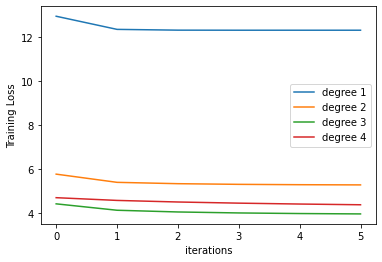

In [87]:
plt.plot(costs160)
plt.plot(costs260)
plt.plot(costs360)
plt.plot(costs460)
plt.xlabel('iterations')
plt.ylabel('Training Loss')
plt.legend(["degree 1", "degree 2", "degree 3", "degree 4"])
plt.show()

In [88]:
costs180, learning180, trainingloss180, validationloss180 = linear_regression_model(X_train_1,y_train,X_val_1,y_val,0.12,80)
costs280, learning280, trainingloss280, validationloss280 = linear_regression_model(X_train_2,y_train,X_val_2,y_val,0.12,80)
costs380, learning380, trainingloss380, validationloss380 = linear_regression_model(X_train_3,y_train,X_val_3,y_val,0.1,80)
costs480, learning480, trainingloss480, validationloss480 = linear_regression_model(X_train_4,y_train,X_val_4,y_val,0.02,80)

Epochs 80/80: 
Training cost 12.328784605422243|Validation cost 16.153581338597753
The final average gradient is: 5.2765755542612836e-05
The final learning rate used is: 0.12
The Mean square error is: 32.30716267719551
-------------------------------
Epochs 80/80: 
Training cost 5.286369935725211|Validation cost 8.46193179483776
The final average gradient is: 0.004520890070910528
The final learning rate used is: 0.12
The Mean square error is: 16.92386358967552
-------------------------------
Epochs 80/80: 
Training cost 3.956721854950219|Validation cost 5.47170796777702
The final average gradient is: 0.010232948896068295
The final learning rate used is: 0.1
The Mean square error is: 10.94341593555404
-------------------------------
Epochs 80/80: 
Training cost 4.336717302557177|Validation cost 5.729655078504988
The final average gradient is: 0.060280293003470056
The final learning rate used is: 0.02
The Mean square error is: 11.459310157009975
-------------------------------


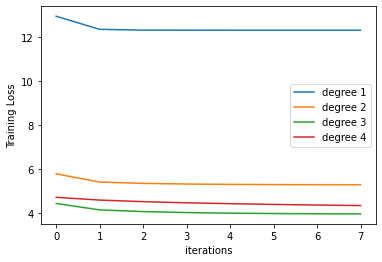

In [89]:
plt.plot(costs180)
plt.plot(costs280)
plt.plot(costs380)
plt.plot(costs480)
plt.xlabel('iterations')
plt.ylabel('Training Loss')
plt.legend(["degree 1", "degree 2", "degree 3", "degree 4"])
plt.show()

In [90]:
costs1100, learning1100, trainingloss1100, validationloss1100 = linear_regression_model(X_train_1,y_train,X_val_1,y_val,0.03,100)
costs2100, learning2100, trainingloss2100, validationloss2100 = linear_regression_model(X_train_2,y_train,X_val_2,y_val,0.06,100)
costs3100, learning3100, trainingloss3100, validationloss3100 = linear_regression_model(X_train_3,y_train,X_val_3,y_val,0.05,100)
costs4100, learning4100, trainingloss4100, validationloss4100 = linear_regression_model(X_train_4,y_train,X_val_4,y_val,0.02,100)

Epochs 100/100: 
Training cost 12.34067255214959|Validation cost 16.04088523378652
The final average gradient is: 0.05312987669675048
The final learning rate used is: 0.03
The Mean square error is: 32.08177046757304
-------------------------------
Epochs 100/100: 
Training cost 5.30239659266286|Validation cost 8.431998517814417
The final average gradient is: 0.011146706586806606
The final learning rate used is: 0.06
The Mean square error is: 16.863997035628834
-------------------------------
Epochs 100/100: 
Training cost 3.990348042982919|Validation cost 5.491014967834653
The final average gradient is: 0.019075851609571516
The final learning rate used is: 0.05
The Mean square error is: 10.982029935669306
-------------------------------
Epochs 100/100: 
Training cost 4.293728656327726|Validation cost 5.703304531153622
The final average gradient is: 0.05227550261565606
The final learning rate used is: 0.02
The Mean square error is: 11.406609062307243
-------------------------------


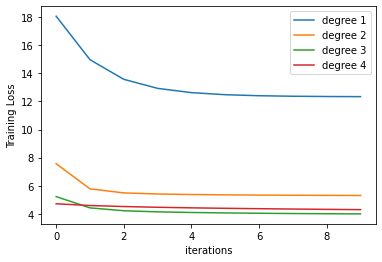

In [91]:
plt.plot(costs1100)
plt.plot(costs2100)
plt.plot(costs3100)
plt.plot(costs4100)
plt.xlabel('iterations')
plt.ylabel('Training Loss')
plt.legend(["degree 1", "degree 2", "degree 3", "degree 4"])
plt.show()

In [92]:
costs1120, learning1120, trainingloss1120, validationloss1120 = linear_regression_model(X_train_1,y_train,X_val_1,y_val,0.03,120)
costs2120, learning2120, trainingloss2120, validationloss2120 = linear_regression_model(X_train_2,y_train,X_val_2,y_val,0.06,120)
costs3120, learning3120, trainingloss3120, validationloss3120 = linear_regression_model(X_train_3,y_train,X_val_3,y_val,0.08,120)
costs4120, learning4120, trainingloss4120, validationloss4120 = linear_regression_model(X_train_4,y_train,X_val_4,y_val,0.02,120)

Epochs 120/120: 
Training cost 12.33238001183733|Validation cost 16.096552324893786
The final average gradient is: 0.023943720642535988
The final learning rate used is: 0.03
The Mean square error is: 32.19310464978757
-------------------------------
Epochs 120/120: 
Training cost 5.293714203286162|Validation cost 8.44276837800922
The final average gradient is: 0.008277421999018823
The final learning rate used is: 0.06
The Mean square error is: 16.88553675601844
-------------------------------
Epochs 120/120: 
Training cost 3.9508908837808225|Validation cost 5.470882397030979
The final average gradient is: 0.007396092380545921
The final learning rate used is: 0.08
The Mean square error is: 10.941764794061958
-------------------------------
Epochs 120/120: 
Training cost 4.256968810723536|Validation cost 5.679215919701384
The final average gradient is: 0.047059540970616036
The final learning rate used is: 0.02
The Mean square error is: 11.358431839402767
-------------------------------


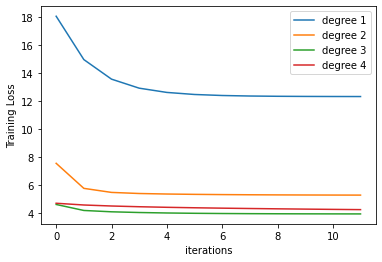

In [93]:
plt.plot(costs1120)
plt.plot(costs2120)
plt.plot(costs3120)
plt.plot(costs4120)
plt.xlabel('iterations')
plt.ylabel('Training Loss')
plt.legend(["degree 1", "degree 2", "degree 3", "degree 4"])
plt.show()

In [94]:
costs1140, learning1140, trainingloss1140, validationloss1140 = linear_regression_model(X_train_1,y_train,X_val_1,y_val,0.03,140)
costs2140, learning2140, trainingloss2140, validationloss2140 = linear_regression_model(X_train_2,y_train,X_val_2,y_val,0.06,140)
costs3140, learning3140, trainingloss3140, validationloss3140 = linear_regression_model(X_train_3,y_train,X_val_3,y_val,0.05,140)
costs4140, learning4140, trainingloss4140, validationloss4140 = linear_regression_model(X_train_4,y_train,X_val_4,y_val,0.03,140)

Epochs 140/140: 
Training cost 12.329900744624759|Validation cost 16.12454866054506
The final average gradient is: 0.013420767785776024
The final learning rate used is: 0.03
The Mean square error is: 32.24909732109012
-------------------------------
Epochs 140/140: 
Training cost 5.288975934847927|Validation cost 8.452851561166481
The final average gradient is: 0.006134412131182716
The final learning rate used is: 0.06
The Mean square error is: 16.905703122332962
-------------------------------
Epochs 140/140: 
Training cost 3.9632320006386705|Validation cost 5.4743208916156165
The final average gradient is: 0.012530712458231653
The final learning rate used is: 0.05
The Mean square error is: 10.948641783231233
-------------------------------
Epochs 140/140: 
Training cost 4.137014215545971|Validation cost 5.591207926871288
The final average gradient is: 0.03559299386973508
The final learning rate used is: 0.03
The Mean square error is: 11.182415853742576
-------------------------------

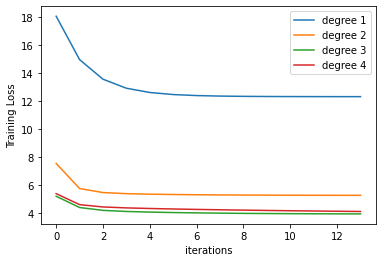

In [95]:
plt.plot(costs1140)
plt.plot(costs2140)
plt.plot(costs3140)
plt.plot(costs4140)
plt.xlabel('iterations')
plt.ylabel('Training Loss')
plt.legend(["degree 1", "degree 2", "degree 3", "degree 4"])
plt.show()

In [96]:
costs1160, learning1160, trainingloss1160, validationloss1160 = linear_regression_model(X_train_1,y_train,X_val_1,y_val,0.03,160)
costs2160, learning2160, trainingloss2160, validationloss2160 = linear_regression_model(X_train_2,y_train,X_val_2,y_val,0.06,160)
costs3160, learning3160, trainingloss3160, validationloss3160 = linear_regression_model(X_train_3,y_train,X_val_3,y_val,0.08,160)
costs4160, learning4160, trainingloss4160, validationloss4160 = linear_regression_model(X_train_4,y_train,X_val_4,y_val,0.03,160)

Epochs 160/160: 
Training cost 12.329136457289428|Validation cost 16.13864682654544
The final average gradient is: 0.007499644591976084
The final learning rate used is: 0.03
The Mean square error is: 32.27729365309088
-------------------------------
Epochs 160/160: 
Training cost 5.2863900461815|Validation cost 8.46145612969436
The final average gradient is: 0.0045351424181459595
The final learning rate used is: 0.06
The Mean square error is: 16.92291225938872
-------------------------------
Epochs 160/160: 
Training cost 3.946727094176023|Validation cost 5.472769933361952
The final average gradient is: 0.003926812354065338
The final learning rate used is: 0.08
The Mean square error is: 10.945539866723903
-------------------------------
Epochs 160/160: 
Training cost 4.10818027167236|Validation cost 5.569872168657437
The final average gradient is: 0.032935678875568544
The final learning rate used is: 0.03
The Mean square error is: 11.139744337314873
-------------------------------


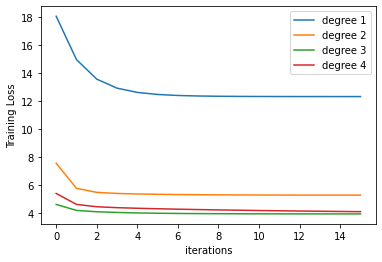

In [97]:
plt.plot(costs1160)
plt.plot(costs2160)
plt.plot(costs3160)
plt.plot(costs4160)
plt.xlabel('iterations')
plt.ylabel('Training Loss')
plt.legend(["degree 1", "degree 2", "degree 3", "degree 4"])
plt.show()

In [98]:
costs1180, learning1180, trainingloss1180, validationloss1180 = linear_regression_model(X_train_1,y_train,X_val_1,y_val,0.03,180)
costs2180, learning2180, trainingloss2180, validationloss2180 = linear_regression_model(X_train_2,y_train,X_val_2,y_val,0.06,180)
costs3180, learning3180, trainingloss3180, validationloss3180 = linear_regression_model(X_train_3,y_train,X_val_3,y_val,0.08,180)
costs4180, learning4180, trainingloss4180, validationloss4180 = linear_regression_model(X_train_4,y_train,X_val_4,y_val,0.03,180)

Epochs 180/180: 
Training cost 12.328896498557029|Validation cost 16.145813243180577
The final average gradient is: 0.004187687596859649
The final learning rate used is: 0.03
The Mean square error is: 32.29162648636115
-------------------------------
Epochs 180/180: 
Training cost 5.284978807229196|Validation cost 8.468442333978466
The final average gradient is: 0.003350896967079088
The final learning rate used is: 0.06
The Mean square error is: 16.93688466795693
-------------------------------
Epochs 180/180: 
Training cost 3.9460526080468097|Validation cost 5.473930044274698
The final average gradient is: 0.002882771145073274
The final learning rate used is: 0.08
The Mean square error is: 10.947860088549396
-------------------------------
Epochs 180/180: 
Training cost 4.083465987442402|Validation cost 5.552203250539839
The final average gradient is: 0.03050565439609988
The final learning rate used is: 0.03
The Mean square error is: 11.104406501079678
-------------------------------


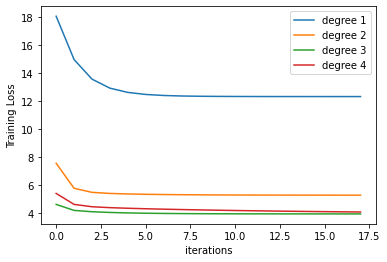

In [99]:
plt.plot(costs1180)
plt.plot(costs2180)
plt.plot(costs3180)
plt.plot(costs4180)
plt.xlabel('iterations')
plt.ylabel('Training Loss')
plt.legend(["degree 1", "degree 2", "degree 3", "degree 4"])
plt.show()

In [100]:
costs1200, learning1200, trainingloss1200, validationloss1200 = linear_regression_model(X_train_1,y_train,X_val_1,y_val,0.03,200)
costs2200, learning2200, trainingloss2200, validationloss2200 = linear_regression_model(X_train_2,y_train,X_val_2,y_val,0.06,200)
costs3200, learning3200, trainingloss3200, validationloss3200 = linear_regression_model(X_train_3,y_train,X_val_3,y_val,0.11,200)
costs4200, learning4200, trainingloss4200, validationloss4200 = linear_regression_model(X_train_4,y_train,X_val_4,y_val,0.03,200)

Epochs 200/200: 
Training cost 12.328820358129201|Validation cost 16.14950301979
The final average gradient is: 0.0023396776530839043
The final learning rate used is: 0.03
The Mean square error is: 32.29900603958
-------------------------------
Epochs 200/200: 
Training cost 5.284208628852646|Validation cost 8.473946757200524
The final average gradient is: 0.0024755601760464855
The final learning rate used is: 0.06
The Mean square error is: 16.94789351440105
-------------------------------
Epochs 200/200: 
Training cost 3.9453828582986734|Validation cost 5.4773961739499795
The final average gradient is: 0.0007007981367460397
The final learning rate used is: 0.11
The Mean square error is: 10.954792347899959
-------------------------------
Epochs 200/200: 
Training cost 4.0622122571208585|Validation cost 5.537745854531001
The final average gradient is: 0.028280062918643628
The final learning rate used is: 0.03
The Mean square error is: 11.075491709062002
-------------------------------


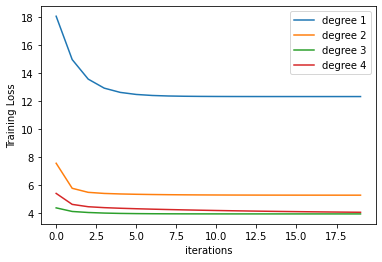

In [101]:
plt.plot(costs1200)
plt.plot(costs2200)
plt.plot(costs3200)
plt.plot(costs4200)
plt.xlabel('iterations')
plt.ylabel('Training Loss')
plt.legend(["degree 1", "degree 2", "degree 3", "degree 4"])
plt.show()

In [102]:
trainingloss_1 = [trainingloss120, trainingloss140, trainingloss160, trainingloss180, trainingloss1100, trainingloss1120, trainingloss1140, trainingloss1160, trainingloss1180, trainingloss1200]
trainingloss_2 = [trainingloss220, trainingloss240, trainingloss260, trainingloss280, trainingloss2100, trainingloss2120, trainingloss2140, trainingloss2160, trainingloss2180, trainingloss2200]
trainingloss_3 = [trainingloss320, trainingloss340, trainingloss360, trainingloss380, trainingloss3100, trainingloss3120, trainingloss3140, trainingloss3160, trainingloss3180, trainingloss3200]
trainingloss_4 = [trainingloss420, trainingloss440, trainingloss460, trainingloss480, trainingloss4100, trainingloss4120, trainingloss4140, trainingloss4160, trainingloss4180, trainingloss4200]

In [103]:
validationloss_1 = [validationloss120, validationloss140, validationloss160, validationloss180, validationloss1100, validationloss1120, validationloss1140, validationloss1160, validationloss1180, validationloss1200]
validationloss_2 = [validationloss220, validationloss240, validationloss260, validationloss280, validationloss2100, validationloss2120, validationloss2140, validationloss2160, validationloss2180, validationloss2200]
validationloss_3 = [validationloss320, validationloss340, validationloss360, validationloss380, validationloss3100, validationloss3120, validationloss3140, validationloss3160, validationloss3180, validationloss3200]
validationloss_4 = [validationloss420, validationloss440, validationloss460, validationloss480, validationloss4100, validationloss4120, validationloss4140, validationloss4160, validationloss4180, validationloss4200]

The graphs below are ussually underfitting (validation loss over training loss). However, this is not always the case because the test and train data is randomized

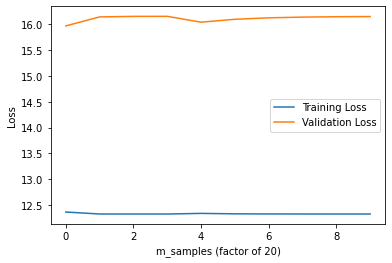

In [104]:
plt.plot(trainingloss_1)
plt.plot(validationloss_1)

plt.xlabel('m_samples (factor of 20)')
plt.ylabel('Loss')
plt.legend(["Training Loss", "Validation Loss"])
plt.show()

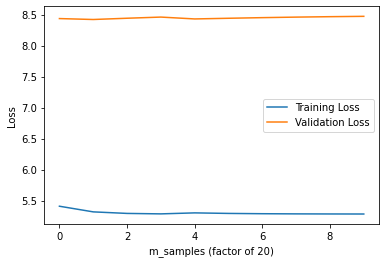

In [105]:
plt.plot(trainingloss_2)
plt.plot(validationloss_2)

plt.xlabel('m_samples (factor of 20)')
plt.ylabel('Loss')
plt.legend(["Training Loss", "Validation Loss"])
plt.show()

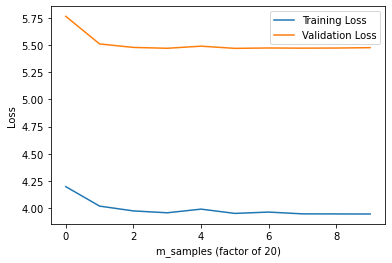

In [106]:
plt.plot(trainingloss_3)
plt.plot(validationloss_3)

plt.xlabel('m_samples (factor of 20)')
plt.ylabel('Loss')
plt.legend(["Training Loss", "Validation Loss"])
plt.show()

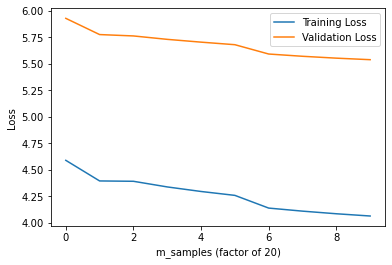

In [107]:
plt.plot(trainingloss_4)
plt.plot(validationloss_4)

plt.xlabel('m_samples (factor of 20)')
plt.ylabel('Loss')
plt.legend(["Training Loss", "Validation Loss"])
plt.show()

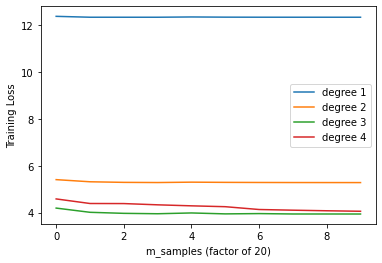

In [108]:
plt.plot(trainingloss_1)
plt.plot(trainingloss_2)
plt.plot(trainingloss_3)
plt.plot(trainingloss_4)
plt.ylabel('Training Loss')
plt.xlabel('m_samples (factor of 20)')
plt.legend(["degree 1", "degree 2", "degree 3", "degree 4"])
plt.show()

After analyzing the data, I will choose to use the 3rd degree polynomial regression with 100 epochs for part C.

In [109]:
df2 = pd.read_csv('Regression-Test.txt', sep=',', header=None, names=["X1", "X2"])
df2.head()

,X1,X2
0,0.750,-0.924
1,-0.811,0.931
2,1.640,0.126
3,-0.389,-1.278
4,-1.953,0.336


In [110]:
X1 = df2[['X1','X2']].to_numpy()
X1.shape

(50, 2)

In [111]:
print(powers_3)

[(0,), (1,), (0, 0), (0, 1), (1, 1), (0, 0, 0), (0, 0, 1), (0, 1, 1), (1, 1, 1)]


In [112]:
X3=transform_data(X1,powers_3)
X3.shape

(50, 9)

In [113]:
def linear_regression_model_extract_bias_and_weights(X_train, y_train, X_val, y_val, learning_rate, epochs):
    lenw = X_train.shape[0]
    w,b = initialize_parameters(lenw)
    costs_train = []
    m_train = X_train.shape[1]
    m_val = X_val.shape[1]
    for i in range(1,epochs+1):
        z_train = forward_prop(X_train,w,b)
        cost_train = cost_function(z_train, y_train)
        dw,db = back_prop(X_train, y_train, z_train)
        w,b = gradient_descent_update(w,b,dw,db,learning_rate)
        
        dw_avg = np.mean(np.abs(dw))
        
        
        if i%10==0:
            costs_train.append(cost_train)
            
        MAE_train = (1/m_train)*np.sum(np.abs(z_train-y_train))
        MSE_train = (1/m_train)*np.sum(np.square(z_train-y_train))
        
        z_val = forward_prop(X_val,w,b)
        cost_val = cost_function(z_val, y_val)
        MAE_val = (1/m_val)*np.sum(np.abs(z_val-y_val))
        MSE_val = (1/m_val)*np.sum(np.square(z_val-y_val))
        #print('Epochs ' +str(i)+'/'+str(epochs)+': ')
        #print('Training cost '+str(cost_train)+ '|'+'Validation cost '+str(cost_val))
        #print('MAE cost '+str(MAE_train)+ '|'+'Validation MAE '+str(MAE_val))
        #print('MSE cost '+str(MAE_train)+ '|'+'Validation MSE '+str(MSE_val))
        #print('gradient' +str(dw))
        #print(dw_avg)

    print('Epochs ' +str(i)+'/'+str(epochs)+': ')
    print('Training cost '+str(cost_train)+ '|'+'Validation cost '+str(cost_val))
    #print('MSE cost '+str(MAE_train)+ '|'+'Validation MSE '+str(MSE_val))
    #print('gradient' +str(dw))
    print('The final average gradient is: '+ str(dw_avg))
    print('The final learning rate used is: '+ str(learning_rate))
    print('The weights used are: '+ str(w))
    print('The bias used is: '+ str(b))
    print('-------------------------------')
    
    #plt.plot(costs_train)
    #plt.xlabel('iterations')
    #plt.ylabel('Training cost')
    #plt.title('Learning rate '+str(learning_rate))
    #plt.show()

    
    return w, b

In [51]:
w, b = linear_regression_model_extract_bias_and_weights(X_train_3,y_train,X_val_3,y_val,0.1,100)

Epochs 100/100: 
Training cost 4.0953685233887125|Validation cost 5.132464039003205
The final average gradient is: 0.0067274994120317955
The final learning rate used is: 0.1
The weights used are: [[-0.47781746  0.19377995  1.26696358  2.41819674  0.80746139  0.91264962
  -0.08388055  0.33487498  0.98754307]]
The bias used is: -1.167327547428704
-------------------------------


In [52]:
X3.shape

(50, 9)

In [53]:
w=w.T

In [54]:
w.shape

(9, 1)

In [55]:
b

-1.167327547428704

In [56]:
new_data =np.dot(X3,w)+b
new_data

array([[-2.11450524],
       [-0.8687386 ],
       [ 6.00152336],
       [-0.8279859 ],
       [-3.77459491],
       [ 1.57166534],
       [-1.10721901],
       [-1.35892463],
       [-0.06111211],
       [-3.3264058 ],
       [-1.96944444],
       [-0.27829884],
       [-1.00717716],
       [-4.61060964],
       [ 0.06171569],
       [ 6.38129455],
       [-1.56763184],
       [ 1.25845119],
       [-1.23364912],
       [ 8.54548162],
       [-0.95579678],
       [ 0.31971714],
       [ 2.131116  ],
       [-1.26078874],
       [-1.99531148],
       [ 0.4560447 ],
       [ 1.87054913],
       [-0.80385252],
       [ 3.37477226],
       [ 2.61212602],
       [-2.55186095],
       [-1.10535883],
       [ 4.71072109],
       [ 1.059195  ],
       [ 1.75612128],
       [-0.79537209],
       [ 6.12023461],
       [-7.50308521],
       [ 1.29418749],
       [ 0.87732214],
       [-5.4000593 ],
       [-2.26027299],
       [ 0.08428912],
       [-2.35234294],
       [ 3.49208525],
       [-0

In [57]:
print('Array:\n', new_data)
file = open("file1.txt", "w+")
 
# Saving the array in a text file
content = str(new_data)
file.write(content)
file.close()

Array:
 [[-2.11450524]
 [-0.8687386 ]
 [ 6.00152336]
 [-0.8279859 ]
 [-3.77459491]
 [ 1.57166534]
 [-1.10721901]
 [-1.35892463]
 [-0.06111211]
 [-3.3264058 ]
 [-1.96944444]
 [-0.27829884]
 [-1.00717716]
 [-4.61060964]
 [ 0.06171569]
 [ 6.38129455]
 [-1.56763184]
 [ 1.25845119]
 [-1.23364912]
 [ 8.54548162]
 [-0.95579678]
 [ 0.31971714]
 [ 2.131116  ]
 [-1.26078874]
 [-1.99531148]
 [ 0.4560447 ]
 [ 1.87054913]
 [-0.80385252]
 [ 3.37477226]
 [ 2.61212602]
 [-2.55186095]
 [-1.10535883]
 [ 4.71072109]
 [ 1.059195  ]
 [ 1.75612128]
 [-0.79537209]
 [ 6.12023461]
 [-7.50308521]
 [ 1.29418749]
 [ 0.87732214]
 [-5.4000593 ]
 [-2.26027299]
 [ 0.08428912]
 [-2.35234294]
 [ 3.49208525]
 [-0.39513822]
 [ 2.86690466]
 [ 3.13396797]
 [-0.13468329]
 [ 6.37695568]]


In [58]:
Xvals = pd.DataFrame(X3, columns = ['X1','X2','X3','X4','X5','X6','X7','X8','X9'])
Xvals['y'] = new_data.tolist()
Xvals['y'] = Xvals['y'].str[0]
Xvals.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,y
0,0.750,-0.924,0.562500,-0.693000,0.853776,0.421875,-0.519750,0.640332,-0.788889,-2.114505
1,-0.811,0.931,0.657721,-0.755041,0.866761,-0.533412,0.612338,-0.702943,0.806954,-0.868739
2,1.640,0.126,2.689600,0.206640,0.015876,4.410944,0.338890,0.026037,0.002000,6.001523
3,-0.389,-1.278,0.151321,0.497142,1.633284,-0.058864,-0.193388,-0.635347,-2.087337,-0.827986
4,-1.953,0.336,3.814209,-0.656208,0.112896,-7.449150,1.281574,-0.220486,0.037933,-3.774595


In [59]:
shuffle_df = Xvals.sample(frac=1)
train_size = int(0.8 * len(Xvals))
train_set = shuffle_df[:train_size]
test_set = shuffle_df[train_size:]

In [60]:
X_train = train_set[['X1','X2','X3','X4','X5','X6','X7','X8','X9']].to_numpy()
X_test = test_set[['X1','X2','X3','X4','X5','X6','X7','X8','X9']].to_numpy()
y_train = train_set[['y']].to_numpy()
y_test = test_set[['y']].to_numpy()

In [61]:
X_train = X_train.T
y_train = y_train.T
X_test = X_test.T
y_test = y_test.T

In [62]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(9, 40)
(1, 40)
(9, 10)
(1, 10)


In [63]:
costs5, learning5, trainingloss5, validationloss5 = linear_regression_model(X_train,y_train,X_test,y_test,0.1,100)

Epochs 100/100: 
Training cost 0.03127961367794762|Validation cost 0.03663376205928477
The final average gradient is: 0.018745018990723394
The final learning rate used is: 0.1
The Mean square error is: 0.07326752411856954
-------------------------------


The low sample loss (mean squared error) confirms the accuracy